In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = r"C:\Windows\Fonts\malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# data load
df = pd.read_excel(r'.\datasets\250716.xlsx')
print(df.head())

   순번                   출발지 주소              중간집결지 주소            최종 도착지 주소  \
0   1  경기도 고양시 덕양구 중앙로633번길 12   경기도 고양시 덕양구 혜음로 142  경기도 고양시 덕양구 혜음로 142   
1   2   대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3   서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   
3   4        서울특별시 강남구 학동로 432       경기도 과천시 중앙로 294      경기도 과천시 중앙로 294   
4   5         대구광역시 남구 명덕로 236      대구광역시 수성구 무열로 56     대구광역시 수성구 무열로 56   

    중간집결 기한    최종도착 기한 이동방법  
0  0+1일 14시   0+1일 14시   개별  
1  0+28일 9시  0+28일 14시   집단  
2   0+3일 8시   0+3일 14시   집단  
3  0+1일 14시   0+1일 14시   개별  
4  0+3일 14시   0+3일 14시   개별  


In [5]:
# statistics
print(df.shape)
print(df['이동방법'].value_counts())

(815775, 7)
이동방법
개별    412505
집단    403270
Name: count, dtype: int64


In [109]:
# 집단 / 개별 split
df_group = df[df['이동방법'] == '집단'].drop(columns = '이동방법')
df_solo = df[df['이동방법'] == '개별'].drop(columns = '이동방법')

# EDA

In [110]:
# 집단 / 중간집결 기한
mid_group = df_group['중간집결 기한'].str.split('일', expand = True)
mid_group.columns = ['Mday_mid', 'Mhour_mid']
mid_group['Mday_mid'] = mid_group['Mday_mid'].str.replace('0+', '').astype(int)
mid_group['Mhour_mid'] = mid_group['Mhour_mid'].str.replace('시', '').astype(int)

# 집단 / 최종도착 기한
fin_group = df_group['최종도착 기한'].str.split('일', expand = True)
fin_group.columns = ['Mday_fin', 'Mhour_fin']
fin_group['Mday_fin'] = fin_group['Mday_fin'].str.replace('0+', '').astype(int)
fin_group['Mhour_fin'] = fin_group['Mhour_fin'].str.replace('시', '').astype(int)

df_group = pd.concat([df_group, mid_group, fin_group], axis = 1).drop(columns = ['중간집결 기한', '최종도착 기한'])
print(df_group.head(3))

   순번                  출발지 주소              중간집결지 주소            최종 도착지 주소  \
1   2  대구광역시 서구 북비산로61길 20-24      경상북도 경주시 태종로 516  경기도 고양시 덕양구 동헌로 305   
2   3  서울특별시 양천구 목동중앙본로11길 19  서울특별시 서초구 사평대로45길 26  강원특별자치도 동해시 대동로 430   
5   6    충청북도 청주시 상당구 수영로 328     충청북도 증평군 초평로 1717    충청북도 증평군 초평로 1717   

   Mday_mid  Mhour_mid  Mday_fin  Mhour_fin  
1        28          9        28         14  
2         3          8         3         14  
5        23         14        23         14  


In [120]:
# 중간집결 일이 최종도착 일보다 늦은 경우
print(np.where(df_group['Mday_mid'] > df_group['Mday_fin']))
# 없다. 정상.

# 중간집결 일+시 가 최종도착 일+시 보다 늦은 경우

(array([], dtype=int64),)


In [117]:
df_group['Mday_mid']

1         28
2          3
5         23
9          1
13         1
          ..
815766     7
815767    21
815768     7
815771     1
815773     7
Name: Mday_mid, Length: 403270, dtype: int64

In [118]:
np.where(df_group['Mday_mid'] > df_group['Mday_fin'])

(array([], dtype=int64),)

# 시각화

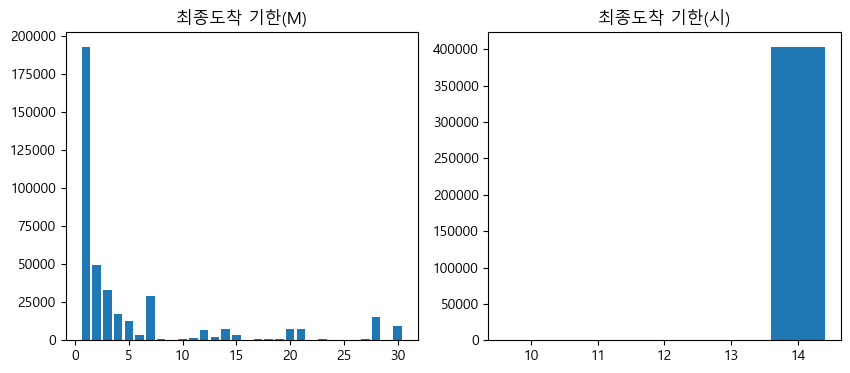

In [ ]:
# 막대그래프
idx1 = np.sort(Mday_fin_group.unique())
height1 = Mday_fin_group.value_counts().sort_index()

idx2 = np.sort(Mhour_fin_group.unique())
height2 = Mhour_fin_group.value_counts().sort_index()

fig = plt.figure(figsize = (10,4))

ax = fig.add_subplot(1, 2, 1)
ax.bar(idx1, height1)
ax.set_title('최종도착 기한(M)')

ax = fig.add_subplot(1, 2, 2)
ax.bar(idx2, height2)
ax.set_title('최종도착 기한(시)')

plt.show()